In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
file_path = '/content/16k_Movies.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [ ]:
# Drop the 'Unnamed: 0' column as it is not useful
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

In [ ]:
# Convert 'No of Persons Voted' to numeric, coercing errors
df['No of Persons Voted'] = pd.to_numeric(df['No of Persons Voted'].str.replace(',', ''), errors='coerce')

In [ ]:
# Convert 'Duration' to numeric (assuming duration is in minutes)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''), errors='coerce')

In [ ]:
# Summary statistics of the dataset
df.describe()

,Release Date,Rating,No of Persons Voted,Duration
count,16290,12846.000000,12829.000000,0.0
mean,2008-08-13 01:23:00.331491584,6.617632,134.856419,NaN
min,1970-01-25 00:00:00,0.300000,4.000000,NaN
25%,2002-08-14 06:00:00,5.800000,11.000000,NaN
50%,2011-03-11 00:00:00,6.800000,31.000000,NaN
75%,2017-07-07 00:00:00,7.600000,116.000000,NaN
max,2024-11-13 00:00:00,10.000000,10639.000000,NaN
std,NaN,1.415272,366.079345,NaN


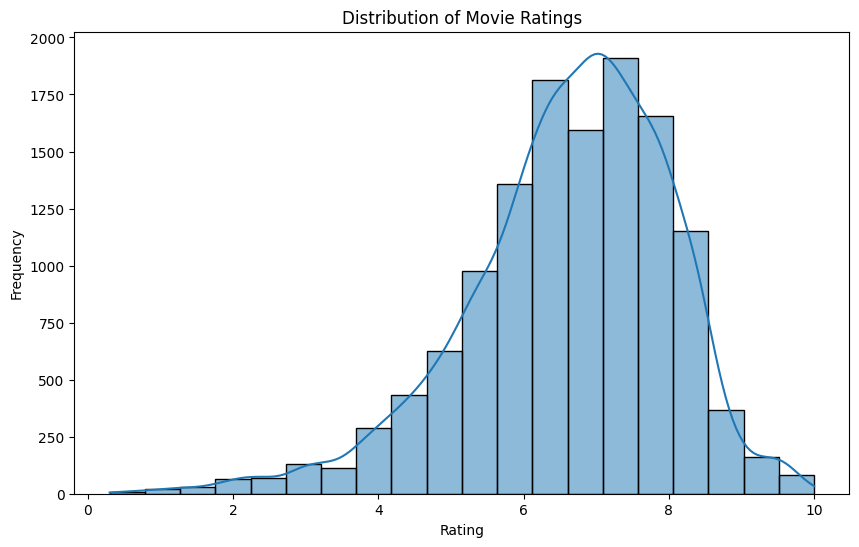

In [ ]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

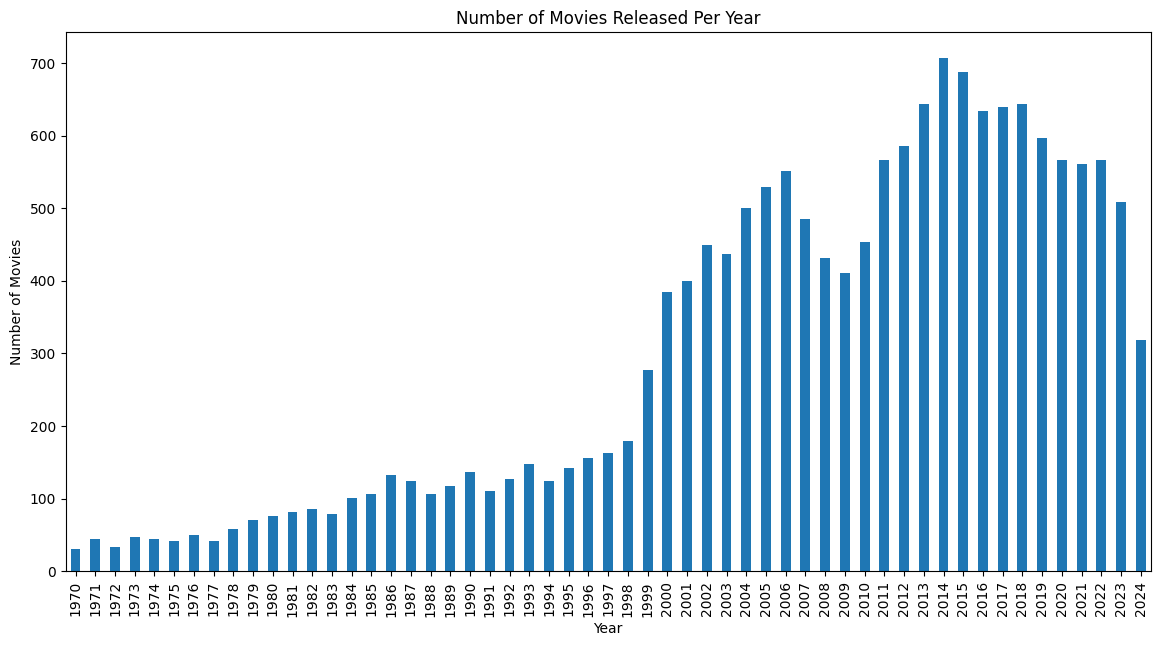

In [ ]:
# Number of movies released per year
df['Year'] = df['Release Date'].dt.year
movies_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

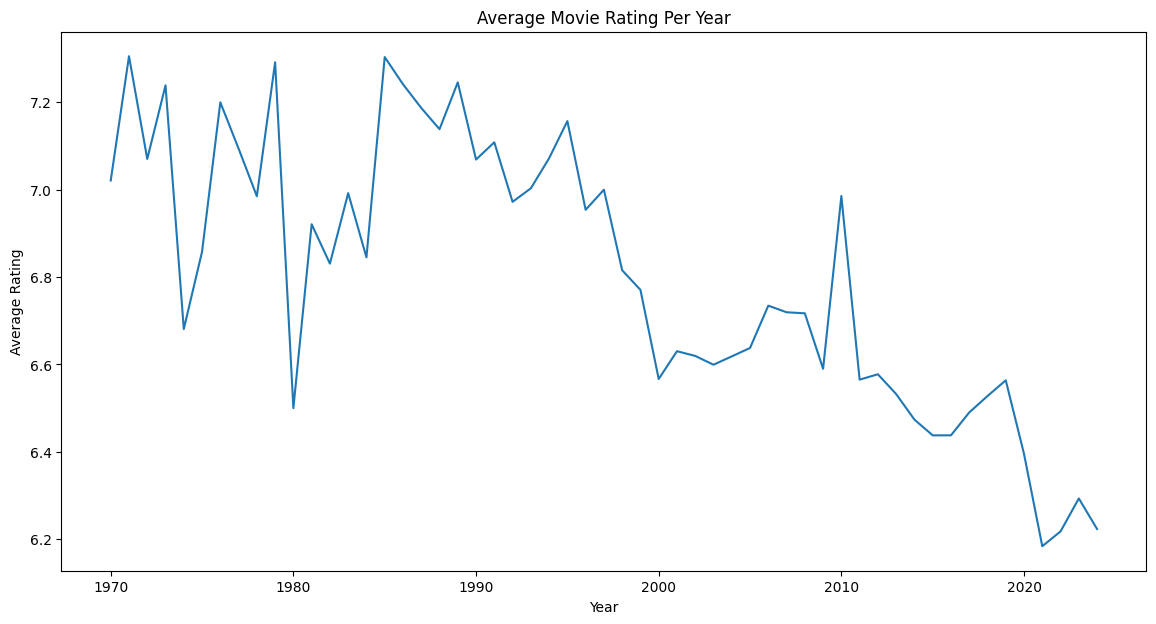

In [ ]:
# Average rating per year
avg_rating_per_year = df.groupby('Year')['Rating'].mean()

plt.figure(figsize=(14, 7))
avg_rating_per_year.plot()
plt.title('Average Movie Rating Per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

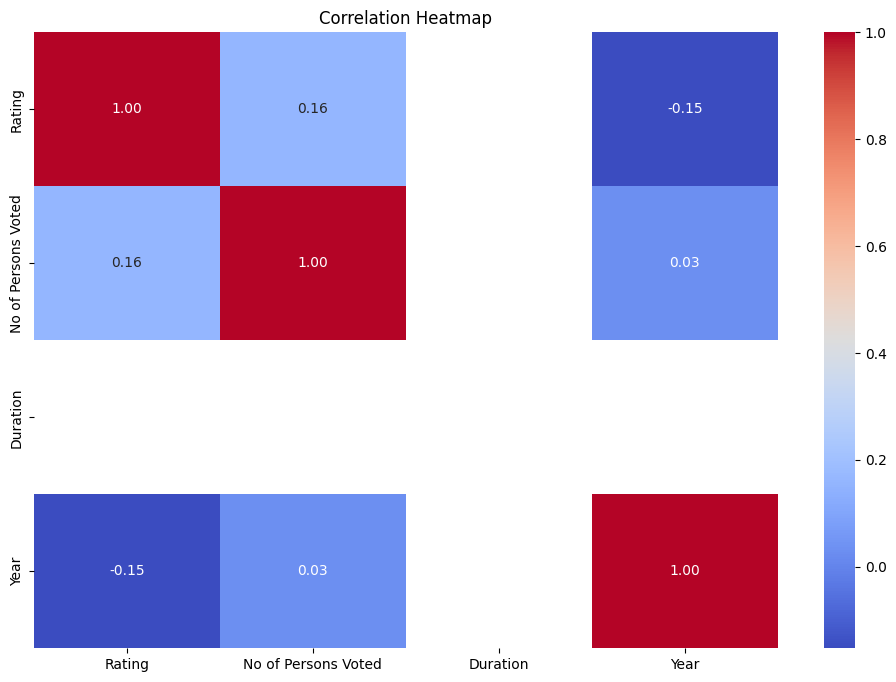

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Prepare data for prediction
features = ['No of Persons Voted', 'Duration', 'Year']
X = df[features].dropna()
y = df.loc[X.index, 'Rating']

# Ensure there are enough samples for train-test split
if len(X) > 0:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse, r2
else:
    print('Not enough data for prediction.')

Not enough data for prediction.


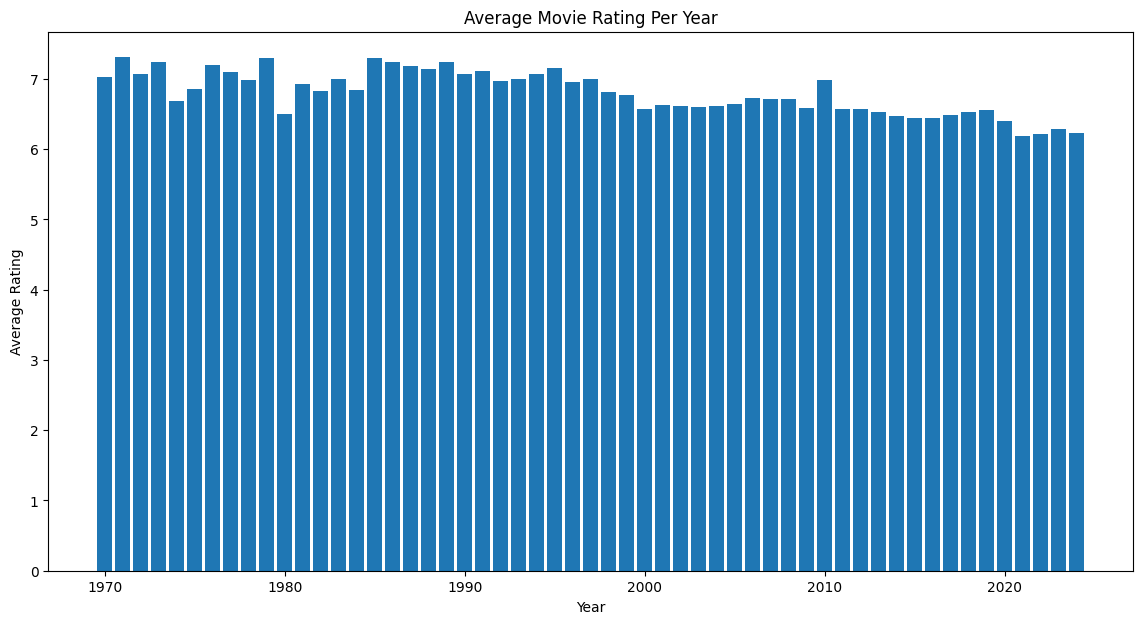

In [ ]:
# Average rating per year
avg_rating_per_year = df.groupby('Year')['Rating'].mean()

plt.figure(figsize=(14, 7))
plt.bar(avg_rating_per_year.index, avg_rating_per_year.values)  # Convert to bar graph
plt.title('Average Movie Rating Per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()
